In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from tsn_analyzer import tsn_analyzer
from network_gen import *

In [2]:
# Define common parameter
burst = 1           # [kb]
latency = 0.001     # [s]
ser_rate = 10000    # [kb/s]
pkt_leng = 0        # [kb]
eta = 1
capacity = eta*ser_rate # [kb/s]
dummy = 1

# initialize analyzer
analyzer = tsn_analyzer()

Fig. 16(a) Reproduce
------------------
Delay vs. # of servers for interleaved tandem

In [3]:
num_servers = np.arange(1, 26)
utility = 0.5

# container of answer
tfa_total_delays = [0]*len(num_servers)
tfa_pp_total_delays = [0]*len(num_servers)

In [4]:
# simulate all possible server numbers
for i, ser_num in enumerate(tqdm(num_servers)):
    # Generate network
    network = generate_interleaved_tandem(size=ser_num,
                                          burst=burst,
                                          arr_rate=dummy,
                                          pkt_leng=pkt_leng,
                                          latency=latency,
                                          ser_rate=ser_rate,
                                          capacity=capacity)
    
    analyzer.parse(network) # parse the network object
    analyzer.set_utility(utility)

    # solve TFA problem
    tfa_delay = analyzer.solve_tfa(f"{ser_num}-server interleave TFA")
    tfa_total_delays[i] = sum(tfa_delay)

    # solve TFA++ problem
    tfa_pp_delay = analyzer.solve_tfa_pp(f"{ser_num}-server interleave TFA++")
    tfa_pp_total_delays[i] = sum(tfa_pp_delay)


 36%|███▌      | 9/25 [00:00<00:00, 27.82it/s]

Problem "3-server interleave TFA++" is Undefined.
Problem "4-server interleave TFA++" is Undefined.
Problem "5-server interleave TFA++" is Undefined.
Problem "6-server interleave TFA++" is Undefined.
Problem "7-server interleave TFA++" is Undefined.
Problem "8-server interleave TFA++" is Undefined.
Problem "9-server interleave TFA++" is Undefined.


 48%|████▊     | 12/25 [00:00<00:00, 19.98it/s]

Problem "10-server interleave TFA++" is Undefined.
Problem "11-server interleave TFA++" is Undefined.
Problem "12-server interleave TFA++" is Undefined.


 60%|██████    | 15/25 [00:00<00:00, 20.00it/s]

Problem "13-server interleave TFA++" is Undefined.
Problem "14-server interleave TFA++" is Undefined.
Problem "15-server interleave TFA++" is Undefined.
Problem "16-server interleave TFA++" is Undefined.


 72%|███████▏  | 18/25 [00:00<00:00, 19.37it/s]

Problem "17-server interleave TFA++" is Undefined.
Problem "18-server interleave TFA++" is Undefined.
Problem "19-server interleave TFA++" is Undefined.
Problem "20-server interleave TFA++" is Undefined.


 92%|█████████▏| 23/25 [00:01<00:00, 17.24it/s]

Problem "21-server interleave TFA++" is Undefined.
Problem "22-server interleave TFA++" is Undefined.
Problem "23-server interleave TFA++" is Undefined.


100%|██████████| 25/25 [00:01<00:00, 18.73it/s]

Problem "24-server interleave TFA++" is Undefined.
Problem "25-server interleave TFA++" is Undefined.


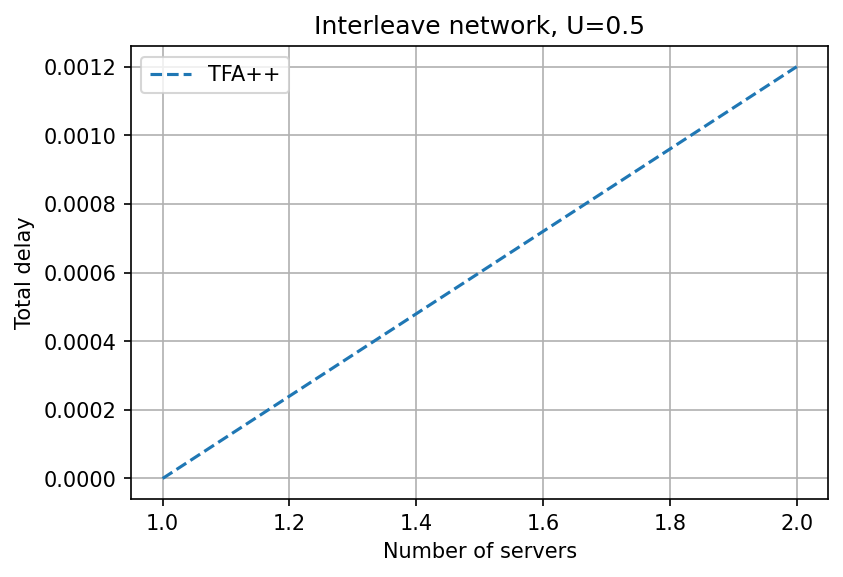

In [5]:
# Plot using matplot
plt.figure(dpi=150)
# plt.plot(num_servers, tfa_total_delays, '-', label="TFA")
plt.plot(num_servers, tfa_pp_total_delays, '--', label="TFA++")
plt.title("Interleave network, U=0.5")
plt.xlabel("Number of servers")
plt.ylabel("Total delay")
plt.legend()
plt.grid()
plt.show()

Fig. 17(a) Reproduce
------------------
Delay vs. network load for interleaved tandem

In [6]:
num_servers = 10
utility = np.arange(0.05, 1.0, 0.05)

# container of answer
tfa_total_delays = [0]*len(utility)
tfa_pp_total_delays = [0]*len(utility)

In [7]:
# simulate all possible server numbers
for i, util in enumerate(tqdm(utility)):
    # Generate network
    network = generate_interleaved_tandem(size=num_servers,
                                          burst=burst,
                                          arr_rate=dummy,
                                          pkt_leng=pkt_leng,
                                          latency=latency,
                                          ser_rate=ser_rate,
                                          capacity=capacity)
    
    analyzer.parse(network) # parse the network object
    analyzer.set_utility(util)

    # solve TFA problem
    tfa_delay = analyzer.solve_tfa(f"{util}-loaded interleave TFA")
    tfa_total_delays[i] = sum(tfa_delay)

    # solve TFA++ problem
    tfa_pp_delay = analyzer.solve_tfa_pp(f"{util}-loaded interleave TFA++")
    tfa_pp_total_delays[i] = sum(tfa_pp_delay)


 16%|█▌        | 3/19 [00:00<00:00, 22.89it/s]

Problem "0.05-loaded interleave TFA++" is Undefined.
Problem "0.1-loaded interleave TFA++" is Undefined.
Problem "0.15000000000000002-loaded interleave TFA++" is Undefined.
Problem "0.2-loaded interleave TFA++" is Undefined.
Problem "0.25-loaded interleave TFA++" is Undefined.


 47%|████▋     | 9/19 [00:00<00:00, 23.34it/s]

Problem "0.3-loaded interleave TFA++" is Undefined.
Problem "0.35000000000000003-loaded interleave TFA++" is Undefined.
Problem "0.4-loaded interleave TFA++" is Undefined.
Problem "0.45-loaded interleave TFA++" is Undefined.
Problem "0.5-loaded interleave TFA++" is Undefined.


 79%|███████▉  | 15/19 [00:00<00:00, 23.19it/s]

Problem "0.55-loaded interleave TFA++" is Undefined.
Problem "0.6000000000000001-loaded interleave TFA++" is Undefined.
Problem "0.6500000000000001-loaded interleave TFA++" is Undefined.
Problem "0.7000000000000001-loaded interleave TFA++" is Undefined.
Problem "0.7500000000000001-loaded interleave TFA++" is Undefined.


100%|██████████| 19/19 [00:00<00:00, 23.13it/s]

Problem "0.8-loaded interleave TFA++" is Undefined.
Problem "0.8500000000000001-loaded interleave TFA++" is Undefined.
Problem "0.9000000000000001-loaded interleave TFA++" is Undefined.
Problem "0.9500000000000001-loaded interleave TFA++" is Undefined.


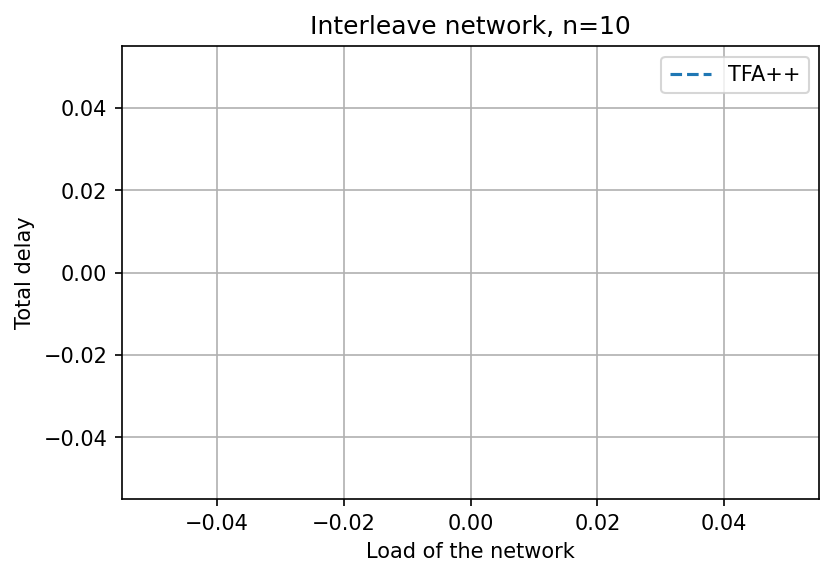

In [8]:
# Plot using matplot
plt.figure(dpi=150)
# plt.plot(utility, tfa_total_delays, '-', label="TFA")
plt.plot(utility, tfa_pp_total_delays, '--', label="TFA++")
plt.title(f"Interleave network, n={num_servers}")
plt.xlabel("Load of the network")
plt.ylabel("Total delay")
plt.legend()
plt.grid()
plt.show()

Fig. 26(a) Reproduce
------------------
Delay vs. # of servers for ring network

In [9]:
num_servers = np.arange(2, 11)
utility = 0.5

# container of answer
tfa_total_delays = [0]*len(num_servers)
tfa_pp_total_delays = [0]*len(num_servers)

In [10]:
# simulate all possible server numbers
for i, ser_num in enumerate(tqdm(num_servers)):
    # Generate network
    network = generate_ring(size=ser_num,
                            burst=burst,
                            arr_rate=dummy,
                            pkt_leng=pkt_leng,
                            latency=latency,
                            ser_rate=ser_rate,
                            capacity=capacity)
    
    analyzer.parse(network) # parse the network object
    analyzer.set_utility(utility)

    # solve TFA problem
    # tfa_delay = analyzer.solve_tfa(f"{ser_num}-server interleave TFA")
    # tfa_total_delays[i] = sum(tfa_delay)

    # solve TFA++ problem
    tfa_pp_delay = analyzer.solve_tfa_pp(f"{ser_num}-server ring TFA++")
    tfa_pp_total_delays[i] = sum(tfa_pp_delay)


100%|██████████| 9/9 [00:00<00:00, 43.17it/s]


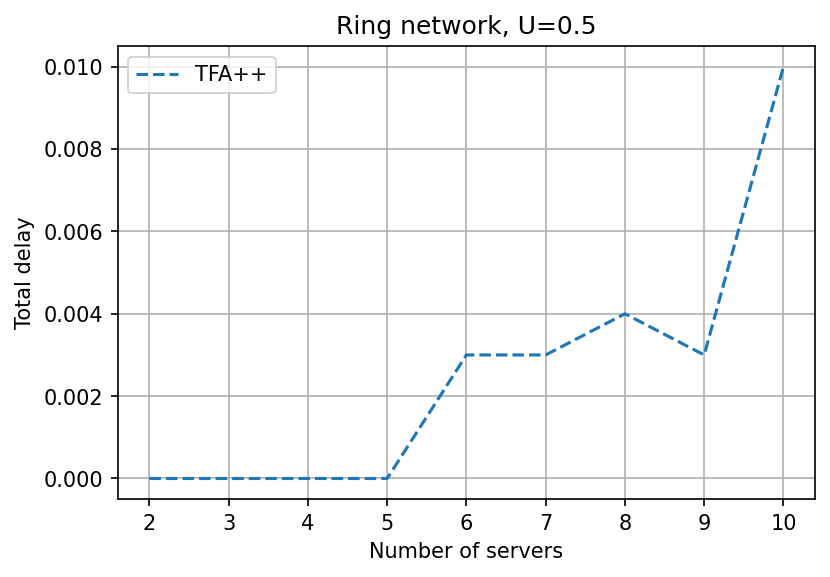

In [11]:
# Plot using matplot
plt.figure(dpi=150)
# plt.plot(num_servers, tfa_total_delays, '-', label="TFA")
plt.plot(num_servers, tfa_pp_total_delays, '--', label="TFA++")
plt.title("Ring network, U=0.5")
plt.xlabel("Number of servers")
plt.ylabel("Total delay")
plt.legend()
plt.grid()
plt.show()

Fig. 26(a) Reproduce
------------------
Delay vs. network load for ring network

In [12]:
num_servers = 2
utility = np.arange(0.05, 1.0, 0.05)

# container of answer
tfa_total_delays = [0]*len(utility)
tfa_pp_total_delays = [0]*len(utility)

In [13]:
# simulate all possible server numbers
for i, util in enumerate(tqdm(utility)):
    # Generate network
    network = generate_ring(size=num_servers,
                            burst=burst,
                            arr_rate=dummy,
                            pkt_leng=pkt_leng,
                            latency=latency,
                            ser_rate=ser_rate,
                            capacity=capacity)
    
    analyzer.parse(network) # parse the network object
    analyzer.set_utility(util)

    # solve TFA problem
    # tfa_delay = analyzer.solve_tfa(f"{util}-loaded interleave TFA")
    # tfa_total_delays[i] = sum(tfa_delay)

    # solve TFA++ problem
    tfa_pp_delay = analyzer.solve_tfa_pp(f"{util}-loaded interleave TFA++")
    tfa_pp_total_delays[i] = sum(tfa_pp_delay)


100%|██████████| 19/19 [00:00<00:00, 80.05it/s]


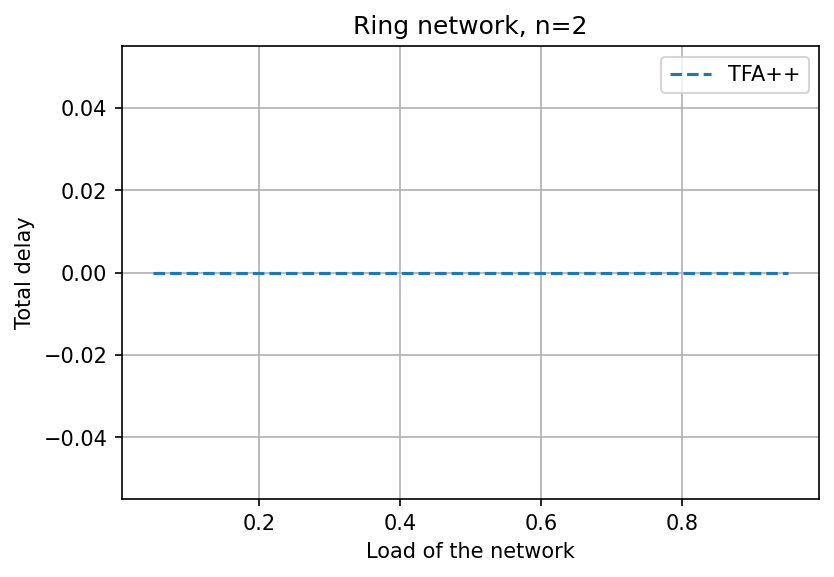

In [14]:
# Plot using matplot
plt.figure(dpi=150)
# plt.plot(utility, tfa_total_delays, '-', label="TFA")
plt.plot(utility, tfa_pp_total_delays, '--', label="TFA++")
plt.title(f"Ring network, n={num_servers}")
plt.xlabel("Load of the network")
plt.ylabel("Total delay")
plt.legend()
plt.grid()
plt.show()

In [15]:
analyzer.set_utility(2)
delays = analyzer.solve_tfa_pp()
print(analyzer.flows, analyzer.servers)
print(delays)
print("OBJECTIVE")
print(analyzer.solver.objective)
print("CONSTRAINTS")
for cname, c in analyzer.solver.constraints.items():
    print(cname, c)


[{'path': [0, 1], 'arrival_curve': {'burst': 1, 'times': [], 'rates': [10000.0]}, 'packet_length': 0}, {'path': [1, 0], 'arrival_curve': {'burst': 1, 'times': [], 'rates': [10000.0]}, 'packet_length': 0}] [{'name': '', 'service_curve': {'latency': 0.001, 'times': [], 'rates': [10000]}, 'capacity': 10000, 'packet_length': 0}, {'name': '', 'service_curve': {'latency': 0.001, 'times': [], 'rates': [10000]}, 'capacity': 10000, 'packet_length': 0}]
[0.0, 0.0]
OBJECTIVE
x_0,0 + x_0,1 + x_1,0 + x_1,1
CONSTRAINTS
_C1 s_0 - t_0 <= 0
_C2 As_0,0 - 10000.0*s_0 - x_0,0 <= -0.0
_C3 As_1,0 - 10000.0*s_0 - x_1,0 <= -0.0
_C4 Dt_0,0 + Dt_1,0 - 10000*t_0 >= -10.0
_C5 Dt_0,0 + Dt_1,0 >= 0
_C6 As_0,0 - Dt_0,0 = 0
_C7 As_1,0 - Dt_1,0 = 0
_C8 d_0 + s_0 - t_0 <= 0
_C9 s_1 - t_1 <= 0
_C10 As_0,1 - 10000.0*s_1 - x_0,1 <= -0.0
_C11 As_1,1 - 10000.0*s_1 - x_1,1 <= -0.0
_C12 Dt_0,1 + Dt_1,1 - 10000*t_1 >= -10.0
_C13 Dt_0,1 + Dt_1,1 >= 0
_C14 As_0,1 - Dt_0,1 = 0
_C15 As_1,1 - Dt_1,1 = 0
_C16 d_1 + s_1 - t_1 <= 0
_C

In [16]:
import pulp
for var in analyzer.solver.variables():
    print(var, pulp.value(var))

As_0,0 0.0
As_0,1 0.0
As_1,0 0.0
As_1,1 0.0
Dt_0,0 0.0
Dt_0,1 0.0
Dt_1,0 0.0
Dt_1,1 0.0
d_0 0.0
d_1 0.0
s_0 0.0
s_1 0.0
t_0 0.0
t_1 0.0
x_0,0 1.0
x_0,1 1.0
x_1,0 1.0
x_1,1 1.0
